## Rob's Lab 6 Data Vis

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [72]:
df = pd.read_csv('run1_output.csv')
df.head()

,t,U,K,P,V,T
0,50.0,-3497.4480,772.87177,11.853313,12417.270,292.31262
1,50.1,-3481.7144,783.87140,112.454560,12392.480,296.47284
2,50.2,-3454.1023,781.36853,66.465279,12562.551,295.52621
3,50.3,-3458.9768,819.90302,-138.283830,12570.822,310.10059
4,50.4,-3440.2219,832.37909,193.880360,12451.572,314.81924


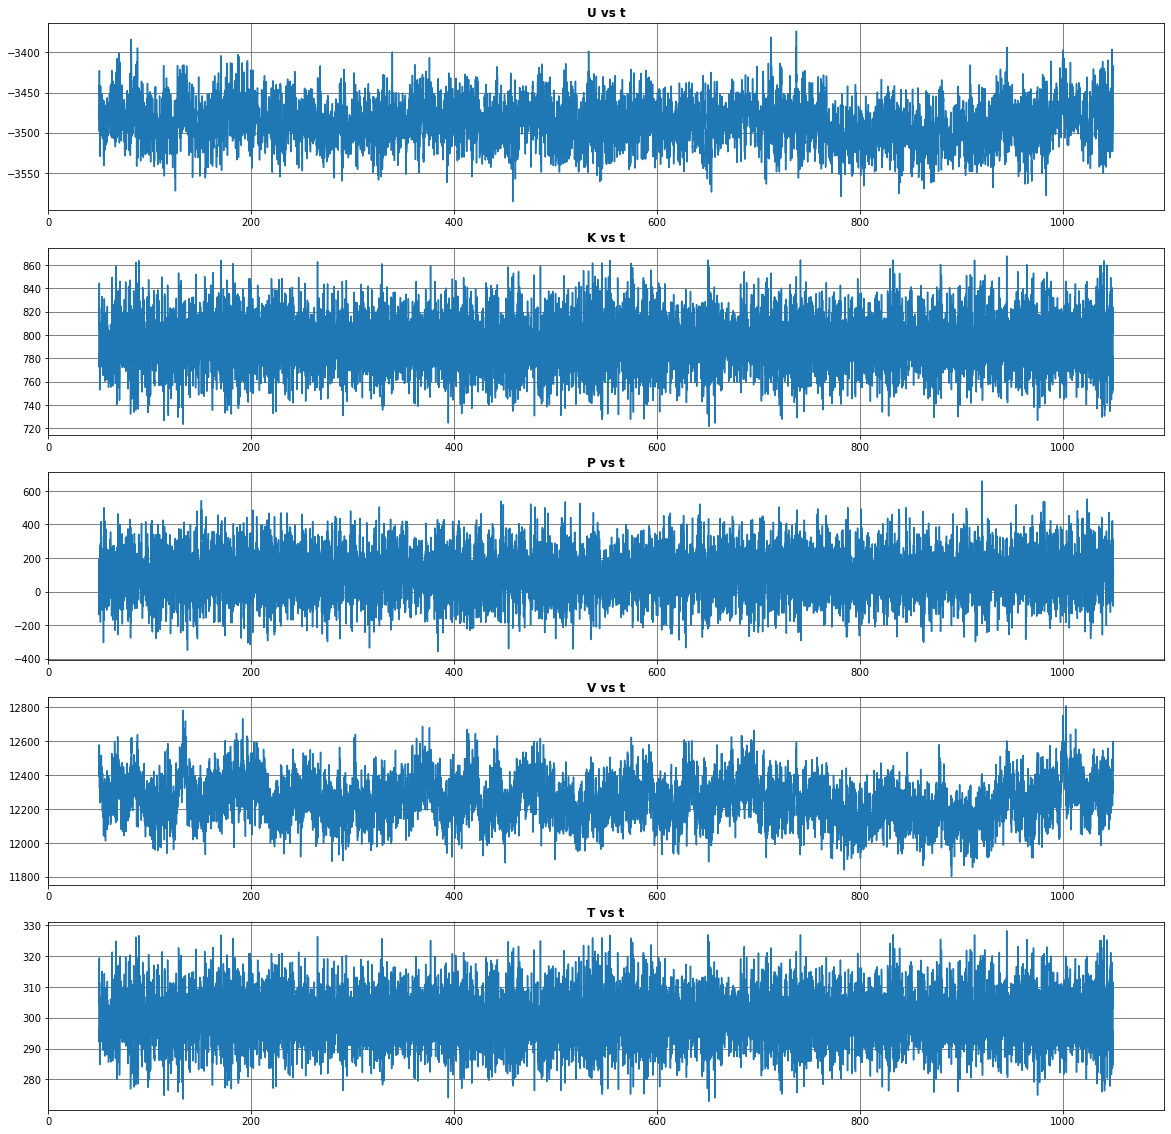

In [75]:
fig, axs = plt.subplots(5,1, figsize=(20,20))


for i in range(1,len(df.columns)):
    axs[i-1].plot(df[df.columns[0]],df[df.columns[i]])
    axs[i-1].set_title(df.columns[i] + ' vs ' + df.columns[0], fontweight="bold")

for ax in axs:
    ax.grid(b=True, which='major', color='#666666', linestyle='-')

Pressure and volume look less correlated than I expected them to, so I plotted them together and calculated the covariance

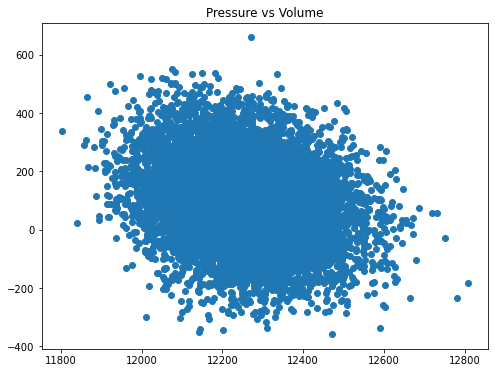

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(df['V'],df['P'])
plt.title("Pressure vs Volume")
plt.show()

In [69]:
v_norm = (df['V']-df['V'].min())/(df['V'].max() - df['V'].min())
p_norm = (df['P']-df['P'].min())/(df['P'].max() - df['P'].min())

covariance = np.sum((v_norm - v_norm.mean()) * (p_norm - p_norm.mean())) / (len(df) - 1)
covariance

-0.0038683087723261414

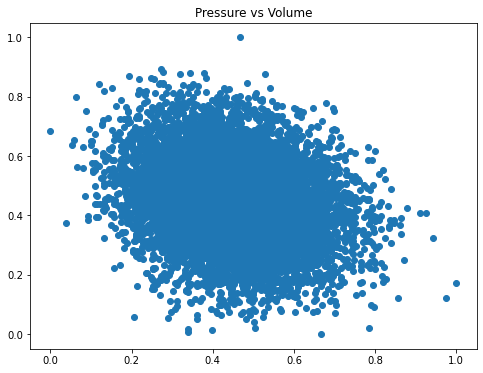

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(v_norm,p_norm)
plt.title("Pressure vs Volume")
plt.show()

Plot Temp vs KE

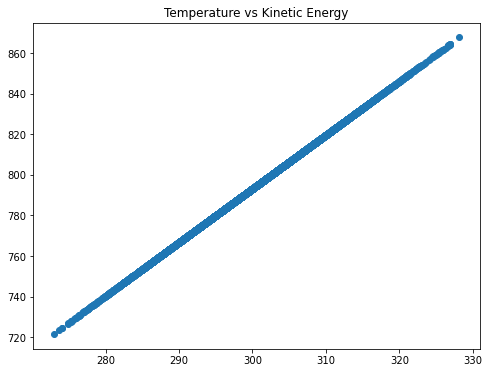

In [77]:
plt.figure(figsize=(8,6))
plt.scatter(df['T'],df['K'])
plt.title("Temperature vs Kinetic Energy")
plt.show()

### Compare Computed Density with Experiment

In [79]:
mol_wt = 78.13 #g/mol or au/molecule
n_mol = 111 #number of molecules
A = 6.022E23 


avg_density = (n_mol*mol_wt/A)/(df['V'].mean()/1E24)
avg_density #units are g/cm^3

1.175396784814825

In [81]:
SEM = df['V'].std() / np.sqrt(len(df['V']))
print('The standard error of the mean volume is', round(SEM,3))

The standard error of the mean volume is 1.279


In [82]:
df['V'].mean()

12252.241642535746

In [83]:
len(df)

10001

In [84]:
avg_density_over = (n_mol*mol_wt/A)/((df['V'].mean()+SEM)/1E24)
avg_density_under = (n_mol*mol_wt/A)/((df['V'].mean()-SEM)/1E24)

In [85]:
avg_density_over

1.175274134855985

In [86]:
avg_density_under

1.1755194603754917

In [90]:
(avg_density-avg_density_over)/avg_density

0.00010434770659965705

In [91]:
(avg_density-avg_density_under)/avg_density

-0.00010436948803294787

In [93]:
(df['V'].mean()+SEM)/df['V'].mean()

1.0001043585961797

### Compute the Heat of Vaporization and Compare it with Experiment

In [101]:
mean_PE = df['U'].mean()/111
mean_PE

-31.42074127425095

In [96]:
dmso_gas = pd.read_csv('dmso_gas.csv')

In [102]:
R = 1.987E-3
T = 300
H_vap = (dmso_gas['U'].mean() - mean_PE) + (R*T)
H_vap

12.657602991307538